# Visualizing Data

Don't just take our word for it - check out scenes for yourself! The AVstack API is a flexible and easy-to-use tool for managing AV datasets. Here, we've linked in an example notebook that shows how to perform some visualizations. 

In [1]:
import os
import avstack
import avapi

data_base = '../../lib-avstack-api/data/'
obj_data_dir_k = os.path.join(data_base, 'KITTI/object')
raw_data_dir_k = os.path.join(data_base, 'KITTI/raw')
data_dir_n     = os.path.join(data_base, 'nuScenes')

Cannot import rss library


### Instantiating Scene Managers

NOTE: on the first go-around, you will have to convert KITTI Raw To AVstack Longitudinal format. Conversion is fast and is only a one-time thing - once you've converted a sequence once, you'll never have to do it again! Set the `convert_raw` flag to `True` to perform conversion.

In [2]:
KSM = avapi.kitti.KittiScenesManager(obj_data_dir_k, raw_data_dir_k, convert_raw=False)
NSM = avapi.nuscenes.nuScenesManager(data_dir_n)

### Deriving SceneDatasets from SceneManagers

By selecting a scene index, you can derive a `SceneDataset` which is a collection of one longitudinal scene. You can choose to get a scene by its `scene_idx` or by its `scene_name`. 

In [3]:
KDM = KSM.get_scene_dataset_by_name(scene_name="2011_09_26_drive_0005_sync")
NDM = NSM.get_scene_dataset_by_index(scene_idx=3)

## Visualizing Ground-Truth and Sensor Data

The `avapi` comes with a few useful visualization tools.


Visualization for KITTI dataset

----ground truth objects with projected 3d boxes on main camera


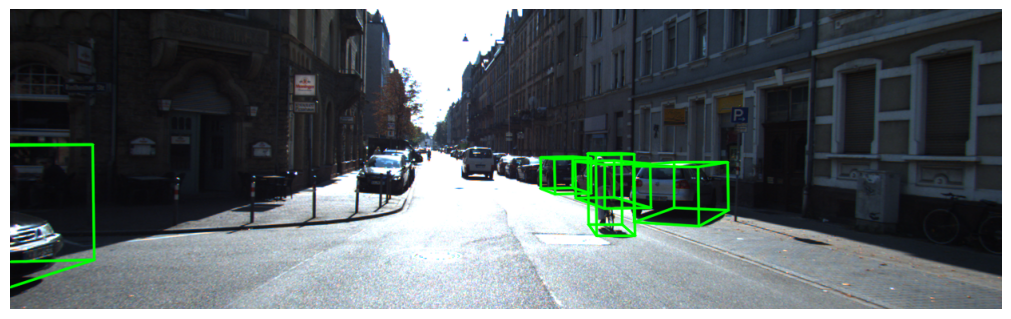

----point cloud projected onto image


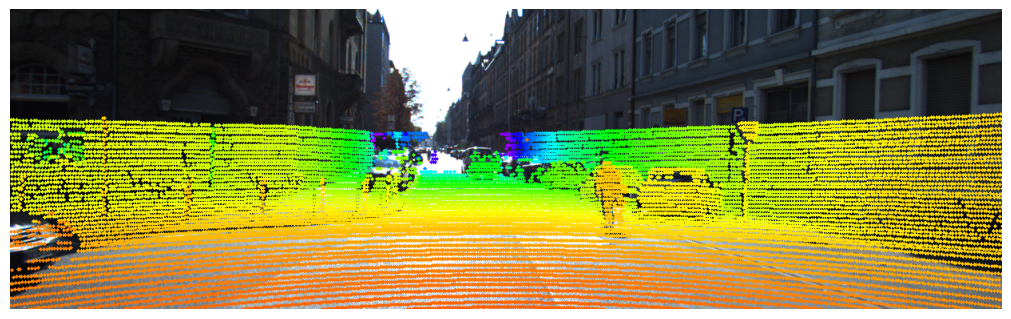


Visualization for nuScenes dataset

----ground truth objects with projected 3d boxes on main camera


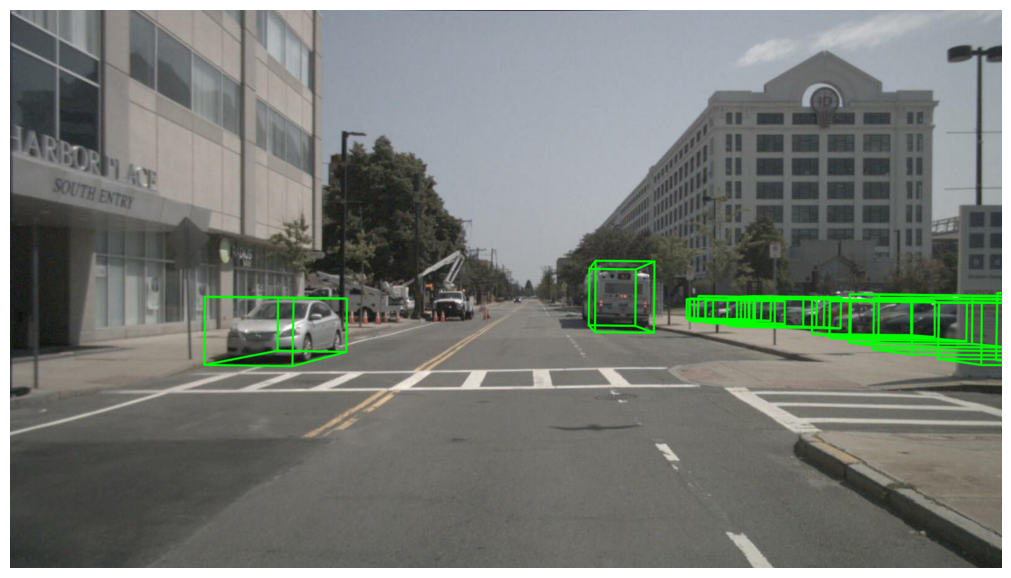

----point cloud projected onto image


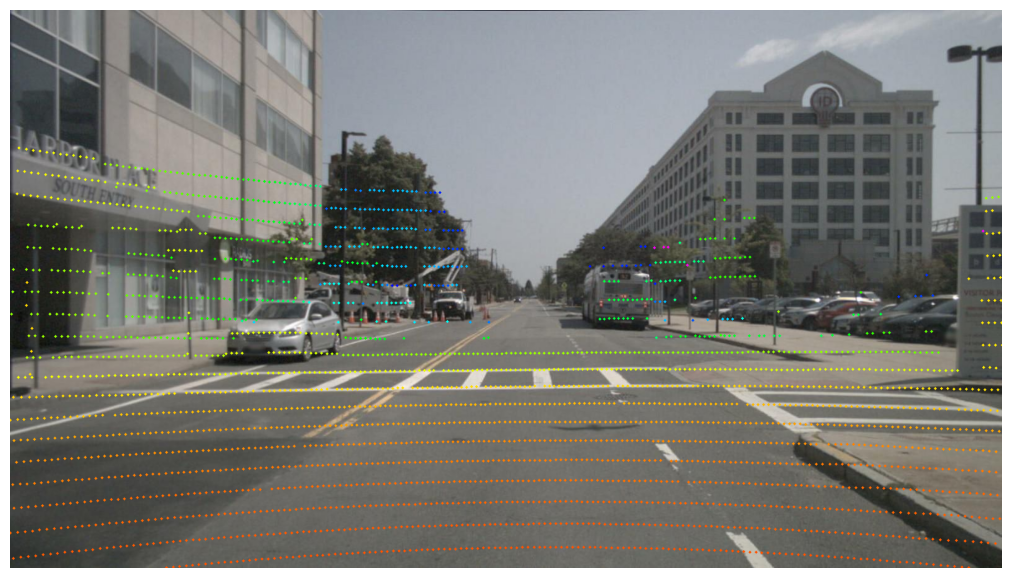

In [4]:
DMs = [KDM, NDM]  # let's loop over both to show the unified API!
frame_idx = [120, 20]  # because I want to show different frames per scene...

for DM, frame_idx in zip(DMs, frame_idx):
    print(f'\nVisualization for {DM.name} dataset\n')
    frame = DM.frames[frame_idx]  # redundant in this case, but could be useful elsewhere
    img = DM.get_image(frame, sensor='main_camera')
    pc = DM.get_lidar(frame, sensor='main_lidar')
    objects = DM.get_objects(frame, sensor='main_lidar')
    print('----ground truth objects with projected 3d boxes on main camera')
    avapi.visualize.show_objects_on_image(img, objects, projection='3d', inline=True)
    print('----point cloud projected onto image')
    avapi.visualize.show_lidar_on_image(pc, img, inline=True)

## Visualizing Sequences with Movies

Currently broken, but under construction!

In [5]:
# gt_tracks = {frame:KDM.get_objects(frame, sensor="main_camera") for frame in KDM.frames}
# avapi.visualize.create_track_percep_movie(KDM, gt_tracks, inline=True)